<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/Empower_Discourse_Module_3_Basic_analysis_and_Analysis_Workshop_Natural_Language_Toolkit_(NLTK)_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.0 Basic analysis  (20 minutes)
In this module we will mess around with some of the basic features of NLTK. Looking at what types of information we can get from the features we have extracted.


  * Basic Information
    * Listing/Counting/Sorting/Ranking
  * Working with NLTK Text Object Variable
    * Concordance
    * Similar
    * n-grams/collocations
    * Data Visualizations


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.1 Reconnecting to the Text Corpus
Since we have openened a new Colab notebook for this module, we will need to load the text file in Google Drive and extract the features again by recreating the variables from module 2. We will need to do something like this for each new module.

*Click the code cells below to rerun the process for this module

In [ ]:
import nltk
import requests
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')


# load data from existing text file
## this following path can be changed to access other text files that you may like to work with.
filename = '/content/drive/MyDrive/empower/Transcriptclean.txt'
uncertaintyText = open(filename, 'rt', encoding='utf-8', errors='replace')

# Extracting Different Features for analysis

# The raw unchanged data from the text file now exists as a variable called "raw_uncertaintyText"
raw_uncertaintyText = uncertaintyText.read()
uncertaintyText.close()

# 1. This line converts our raw text into word tokens
# Regular expression tokenizing Gaps =False
pattern = r'\s+'
uncertainty_wordTokens = nltk.regexp_tokenize(raw_uncertaintyText, pattern, gaps=True)

# 2. This line converts our raw text into sentence tokens
uncertainty_sentTokens = nltk.sent_tokenize(raw_uncertaintyText)

# 3. This line converts our word tokens into NLTK text objects from the tokens
uncertainty_wordTextObjects = nltk.Text(uncertainty_wordTokens)

print(uncertainty_wordTokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Actually,', 'we', 'had', 'a', 'really', 'interesting', 'conversation', 'at', 'the', 'middle', 'school', 'Empower', 'project', 'about', 'is', 'it', 'important', 'to', 'actually', 'separate', 'things', 'out', 'into', 'living', 'and', 'nonliving,', 'and', 'by', 'separating', 'things', 'into', 'living', 'and', 'nonliving,', "you're", 'making', 'certain', 'that', 'you', 'know', 'what', 'your', 'goal', 'is.', "I'm", 'not', 'saying', 'that', 'one', "shouldn't", 'do', 'that,', '[T:', 'Right]', 'but', 'if', 'you', 'are', 'doing', 'that,', 'what', 'are', 'you', 'actually', 'saying', 'to', 'students', 'who', 'actually', 'come', 'from', 'an', 'indigenous', 'background', 'that', 'might', 'not', 'separate', 'things', 'out', 'in', 'that', 'same', 'way?', '[T:', 'Yeah.]', 'How', 'do', 'you', 'actually', 'address', 'those', 'types', 'of', 'things?', "That's", 'something', 'that', 'I', 'will', 'consider', 'how', 'to', 'address.', 'That', 'is', 'a', 'good', 'point.', 'That', 'I', "hadn't", 'considered.

In [ ]:
print("raw_uncertaintyText is a: ",type(raw_uncertaintyText))
print("uncertainty_wordTokens is a: ",type(uncertainty_wordTokens))
print("uncertainty_sentTokens is a: ",type(uncertainty_sentTokens))
print("uncertainty_wordTextObjects is a: ",type(uncertainty_wordTextObjects))

raw_uncertaintyText is a:  <class 'str'>
uncertainty_wordTokens is a:  <class 'list'>
uncertainty_sentTokens is a:  <class 'list'>
uncertainty_wordTextObjects is a:  <class 'nltk.text.Text'>


# 3.2 Interacting with our words tokens: uncertainty_wordTokens

The following text cells will show different ways to look at the word tokens we have created. Just typing in the variable name and executing the code cell will show us a list of all the word tokens in the order that they appear.

Current Variable List
```
raw_uncertaintyText
uncertainty_wordTokens
uncertainty_sentTokens
uncertainty_wordTextObjects
```
If time permits, feel free to replace the current variable with one of the other ones to see how they differ structurally.

In [ ]:
#Executing the variable will show a list of the contents. Tokens are seperated by commas.
uncertainty_wordTokens

['Actually,',
 'we',
 'had',
 'a',
 'really',
 'interesting',
 'conversation',
 'at',
 'the',
 'middle',
 'school',
 'Empower',
 'project',
 'about',
 'is',
 'it',
 'important',
 'to',
 'actually',
 'separate',
 'things',
 'out',
 'into',
 'living',
 'and',
 'nonliving,',
 'and',
 'by',
 'separating',
 'things',
 'into',
 'living',
 'and',
 'nonliving,',
 "you're",
 'making',
 'certain',
 'that',
 'you',
 'know',
 'what',
 'your',
 'goal',
 'is.',
 "I'm",
 'not',
 'saying',
 'that',
 'one',
 "shouldn't",
 'do',
 'that,',
 '[T:',
 'Right]',
 'but',
 'if',
 'you',
 'are',
 'doing',
 'that,',
 'what',
 'are',
 'you',
 'actually',
 'saying',
 'to',
 'students',
 'who',
 'actually',
 'come',
 'from',
 'an',
 'indigenous',
 'background',
 'that',
 'might',
 'not',
 'separate',
 'things',
 'out',
 'in',
 'that',
 'same',
 'way?',
 '[T:',
 'Yeah.]',
 'How',
 'do',
 'you',
 'actually',
 'address',
 'those',
 'types',
 'of',
 'things?',
 "That's",
 'something',
 'that',
 'I',
 'will',
 'consider

In [ ]:
# Placing the variable in a print function shows the contents as well as gives you a view that doesn't run down the page and allows you to do sorting and slicing of the contained data
#print(uncertainty_wordTokens)


# The sorted set, lists and alphabetizes all words that appear at least once throughout the document.
# The numbers at the end currently tell it to show the first 25 tokens. These numbers can be changed to look at different slices of data
print(sorted(set(uncertainty_wordTokens[0:250])))

['Actually,', 'But', 'Empower', 'How', 'I', "I'm", 'It', 'Right]', 'That', "That's", 'Ummm', 'Western', 'Yeah,', 'Yeah.]', 'You', '[T:', 'a', 'abiotic', 'about', 'acknowledge', 'acknowledging(slowly)...', 'actually', 'address', 'address.', 'an', 'and', 'are', 'at', 'background', 'biology', 'biotic', 'but', 'but..', 'by', 'certain', 'class', 'come', 'components,', 'consider', 'considered.', 'conversation', 'current', 'curriculum', 'defines', 'do', "doesn't", 'doing', "don't", 'ecological', 'experience', 'extent.', 'figure', 'from', 'goal', 'good', 'had', "hadn't", 'have', 'heading,', 'how', 'idea', 'if', 'important', 'in', 'incorporate', 'incorporating', 'indigenous', 'interesting', 'into', 'is', 'is.', 'it', 'it.', 'kind', 'know', 'know?', 'knowing�,', 'knowledge', 'knowledge�,', 'know�I', 'like', 'like..,', 'living', 'making', 'mean,', 'mean?', 'meaningfully', 'mean�,', 'middle', 'might', 'more', 'more�traditional', 'my', 'nonliving,', 'not', 'now.', 'of', 'one', 'out', 'point.', 'pro

# Execute code cell to see the total number of characters/tokens

In [ ]:
# How many total word tokens
len(uncertainty_wordTokens)

467

# Looking at the frequency distribution of our words

In [ ]:
#Top 25 most common words with their counts
fd = nltk.FreqDist(uncertainty_wordTokens)
print(fd.most_common(25))

[('to', 18), ('I', 15), ('the', 14), ('a', 11), ('and', 10), ('that', 10), ('of', 10), ('we', 9), ('like', 8), ('is', 7), ('you', 7), ('about', 6), ('do', 6), ('actually', 5), ('what', 5), ("I'm", 5), ('have', 5), ('it', 4), ('things', 4), ('You', 4), ('talk', 4), ('right?', 4), ('going', 4), ('really', 3), ('separate', 3)]


In [ ]:
#Top 25 most common words easier to read from page
fd.tabulate(100)

          to            I          the            a          and         that           of           we         like           is          you        about           do     actually         what          I'm         have           it       things          You         talk       right?        going       really     separate          out         into       living          not          are          But        think       biotic      Western         want        don't      because        know,      things.   nonliving,         know       saying        that,          [T:          who        might           in       That's    something          how         That        that.         kind      defines         some      abiotic        teach  traditional   ecological    knowledge           my      current        class       that�s  acknowledge          way          it.          I'd         does          of,           as         when          for           be         just    Actually,          had

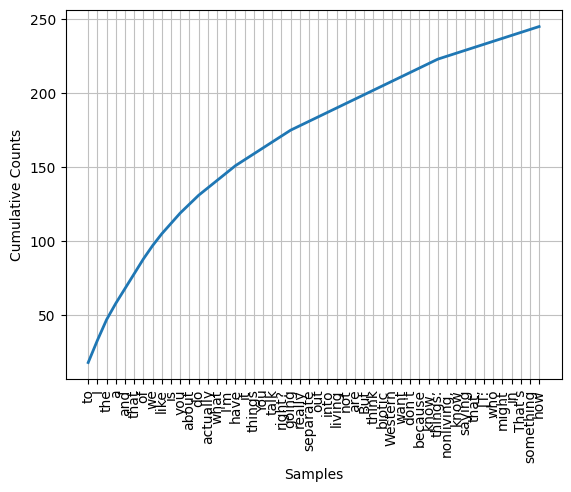

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
# Cumulative plot of top 25 words
fd.plot(50, cumulative=True)

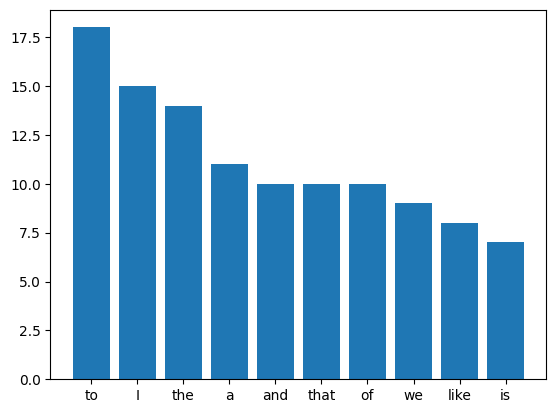

In [ ]:
# Create a frequency distribution

from matplotlib import pyplot as plt

#fd = nltk.FreqDist(tokens_nltk_text)

# Get the 10 most common words and their counts
common = fd.most_common(10)

# Unzip the words and counts into two separate lists
words, counts = zip(*common)

# Create a bar graph
plt.bar(words, counts)
plt.show()

# 3.3 Working with NLTK Text Objects
1. concordance
2. similar words
3. dispersion plots


One of the variables that we created earlier was neither a string of words or a list of words, but was as labeled as a text object. What do we do with that bucket? We can work directly with some of NLTK's builtin functions. Such as concordance, similar, and dispersion plots.

#* concordance()
The concordance function will search your entire data corpus for the existance of a specific word. It shows the word in question along with the surrounding words, providing context to help understand how the word is used in various contexts throughout the text. This can be particularly helpful for studying word usage patterns, exploring word meanings, or analyzing language usage in different contexts.You can see that the whole function itself is simply a merging of our variable name 'uncertainty_wordTextObjects' + the NLTK function 'concordance()'

*Try changing the word found in line 4


In [ ]:
# This line will search for the occurences of one of our uncertainty words.
# After running try using different uncertainty words
# Feel free to change the number of lines that are shown as well
uncertainty_wordTextObjects.concordance("we", lines = 100, width =300)

Displaying 9 of 9 matches:
Actually, we had a really interesting conversation at the middle school Empower project about is it important to actually separate things out into living and non
t is a good point. That I hadn't considered. I like that. But I do think it kind of defines the purview of biology to some extent. You know? I mean, we talk about biotic and abiotic components, and so that's... It defines Western science, right? Yeah, which is what... But that's what I teach right n
 I don't have the current knowledge and experience to do that. I'd really like to somehow connect with someone who does (kinda laughs), ummm because we also don't have a lot of, you know, tribal communities around here because of history. But, you know, as I'm...like� when we talk about cells, right
a laughs), ummm because we also don't have a lot of, you know, tribal communities around here because of history. But, you know, as I'm...like� when we talk about cells, right? When we do cell biology, we do i

# Get frequencies for each word in a list from the corpus

In [ ]:
import nltk
from nltk import word_tokenize
from collections import defaultdict

def get_word_frequencies(words_list, raw_text):
    """
    Get frequencies of words in the list from the given text.

    Parameters:
    - words_list (list): List of words to check frequencies.
    - raw_text (str): The raw text to analyze.

    Returns:
    - defaultdict(int): Dictionary with words and their frequencies.
    """
    # Tokenize the raw text
    tokens = word_tokenize(raw_text)

    # Initialize frequency dictionary
    frequencies = defaultdict(int)

    # Count occurrences of each word
    for word in words_list:
        frequencies[word] = tokens.count(word)

    return frequencies

# Sample usage:
raw_text = raw_uncertaintyText  # Replace this with your actual text
words_list = ["empower", "lead", "initiate", "control", "drive", "choose", "decide", "capable",
    "proficient", "master", "competent", "responsible", "accountable", "engage",
    "participate", "interest", "confident", "voice", "express", "share", "drive",
    "motivation", "express", "independent", "self-directed", "choose", "decide",
    "grow", "develop", "mature", "progress", "tend", "don’t", "can’t", "told",
    "given", "assigned", "struggle", "unable", "difficult", "challenge", "dependent",
    "guidance", "passive", "uninterested", "quiet", "silent", "mute", "unmotivated",
    "idle", "supervise", "guided", "monitor", "stuck", "disengaged", "empty vessels",
    "sponges", "tend", "don’t", "can’t", "hands", "initiative", "experience", "might",
    "could", "should", "must", "barrier", "challenge", "un-", "in-", "dis-", "i",
    "you", "we", "they", "they tend to", "they often", "i feel that", "i believe",
    "in my experience", "students might be able to", "students can", "student", "society",
    "experience", "believe"]  # Adjust this list as needed
result = get_word_frequencies(words_list, raw_text)

# Printing results:
for word, freq in result.items():
    print(f"{word}: {freq} occurrences")


empower: 0 occurrences
lead: 7 occurrences
initiate: 0 occurrences
control: 3 occurrences
drive: 11 occurrences
choose: 12 occurrences
decide: 6 occurrences
capable: 2 occurrences
proficient: 0 occurrences
master: 7 occurrences
competent: 0 occurrences
responsible: 6 occurrences
accountable: 0 occurrences
engage: 8 occurrences
participate: 1 occurrences
interest: 6 occurrences
confident: 3 occurrences
voice: 2 occurrences
express: 0 occurrences
share: 20 occurrences
motivation: 0 occurrences
independent: 0 occurrences
self-directed: 0 occurrences
grow: 3 occurrences
develop: 6 occurrences
mature: 0 occurrences
progress: 4 occurrences
tend: 6 occurrences
don’t: 0 occurrences
can’t: 0 occurrences
told: 20 occurrences
given: 22 occurrences
assigned: 1 occurrences
struggle: 12 occurrences
unable: 0 occurrences
difficult: 11 occurrences
challenge: 11 occurrences
dependent: 1 occurrences
guidance: 4 occurrences
passive: 0 occurrences
uninterested: 0 occurrences
quiet: 0 occurrences
silent: 0

# Concordance + Sentence number

In [ ]:
import nltk
from nltk import ngrams
from nltk.text import Text

# Assuming you've already tokenized your text
corpus_words = nltk.word_tokenize(raw_uncertaintyText)
corpus_text = Text(corpus_words)

# Split the corpus into sentences and then tokenize each sentence
sentences = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(raw_uncertaintyText)]

def display_concordance_with_sentence_number(text, word, width=40, lines=25):
    """
    Display concordance with sentence numbers.

    Parameters:
    - text (nltk.Text): Text object created from tokens.
    - word (str): word of interest for concordance.
    - width (int): width of the context window.
    - lines (int): max number of lines to display.
    """
    # Count and display word frequency
    word_frequency = text.tokens.count(word)
    print(f"The word '{word}' appears {word_frequency} times in the text.\n")

    half_width = (width - len(word) - 2) // 2
    context = width // 4  # approx number of words of context

    # Gather matching offsets and their respective sentence numbers
    offsets = [i for i, w in enumerate(text) if w.lower() == word.lower()]
    sent_nums = [i for i, s in enumerate(sentences) for offset in offsets if offset in range(text.tokens.index(s[0]), text.tokens.index(s[-1])+1)]

    # Filter unique and print with concordance
    for i, (offset, sent_num) in enumerate(set(zip(offsets, sent_nums))):
        if i >= lines:
            break
        left = (' '.join(text.tokens[offset-context:offset]))
        right = (' '.join(text.tokens[offset+1:offset+context+1]))
        left = left[-half_width:]
        right = right[:half_width]
        print(f"Sentence {sent_num + 1}: {left} {text[offset]} {right}")

word_of_interest = "trying"  # Or any other word you're interested in

# Specify the number of sentences to show and width of context
num_sentences = 50  # adjust this value as needed
context_width = 700  # adjust this value as needed

display_concordance_with_sentence_number(corpus_text, word_of_interest, width=context_width, lines=num_sentences)



The word 'trying' appears 104 times in the text.



KeyboardInterrupt: ignored

# Newst code concordance with sentence numbers

In [ ]:
import nltk
from nltk import ngrams
from nltk.text import Text

# Assuming you've already tokenized your text
corpus_words = nltk.word_tokenize(raw_uncertaintyText)
corpus_text = Text(corpus_words)

# Split the corpus into sentences without tokenizing them
sentences_raw = nltk.sent_tokenize(raw_uncertaintyText)
# Tokenize each sentence separately
sentences = [nltk.word_tokenize(sent) for sent in sentences_raw]

def display_concordance_with_sentence_number(text, word, num_before=1, num_after=1, lines=25):
    """
    Display concordance with sentence numbers.

    Parameters:
    - text (nltk.Text): Text object created from tokens.
    - word (str): word of interest for concordance.
    - num_before (int): number of sentences before the matching sentence to display.
    - num_after (int): number of sentences after the matching sentence to display.
    - lines (int): max number of lines to display.
    """
    # Count and display word frequency
    word_frequency = text.tokens.count(word)
    print(f"The word '{word}' appears {word_frequency} times in the text.\n")

    # Gather matching offsets and their respective sentence numbers
    offsets = [i for i, w in enumerate(text) if w.lower() == word.lower()]
    sent_nums = [i for i, s in enumerate(sentences) for offset in offsets if offset in range(text.tokens.index(s[0]), text.tokens.index(s[-1])+1)]

    # Filter unique and print with concordance
    for _, sent_num in enumerate(set(sent_nums)):
        if _ >= lines:
            break
        start = max(0, sent_num - num_before)
        end = min(len(sentences_raw), sent_num + num_after + 1)
        for i in range(start, end):
            if i == sent_num:
                print(f"> Sentence {i + 1}: {sentences_raw[i]}")
            else:
                print(f"Sentence {i + 1}: {sentences_raw[i]}")
        print("\n")

word_of_interest = "tend"  # Or any other word you're interested in

# Specify the number of sentences before and after the matching sentence to show
num_before = 2  # adjust this value as needed
num_after = 2  # adjust this value as needed
max_lines = 5  # adjust this value as needed

display_concordance_with_sentence_number(corpus_text, word_of_interest, num_before=num_before, num_after=num_after, lines=max_lines)


The word 'tend' appears 6 times in the text.

Sentence 5292: Yeah, are we sort of arbitrarily breaking up ideas
because we're splitting them into slides like this?
Sentence 5293: Whereas if we just had a whiteboard or...
Yeah, I was about to say, if there was a transparency,
would we be...
Like, I just threw away the overhead projector.
> Sentence 5294: Oh, you shouldn't have thrown it away!
Sentence 5295: There was this alternate...
My classroom was such a mess, Barbara.
Sentence 5296: We still have one in 4F.




#* similar()

This NLTK function is used to find words that appear in a similar context as the given word in a text corpus. It looks at the context in which a word appears—specifically, the words that appear immediately before and after the target word—and finds other words that appear in the same or similar contexts.

This can be useful for semantic analysis, linguistic exploration, and various natural language processing tasks. It allows us to see words that are used in similar ways and therefore might be considered similar in meaning within the text.



In [ ]:
uncertainty_wordTextObjects.similar("agency")

#* dispersion_plot()

This function used to create a lexical dispersion plot, which visualizes the distribution of words in a text over the entirety of the data corpus. This plot helps you see where certain words occur throughout the text and whether there are any patterns or clusters of word occurrences.
The dispersion plot displays a series of dashes or markers along a horizontal axis that represents the length of the text. Each dash or marker corresponds to the position of a specific word within the text. By visualizing the distribution of words in this way, you can quickly identify trends, repetition, and patterns of word usage.

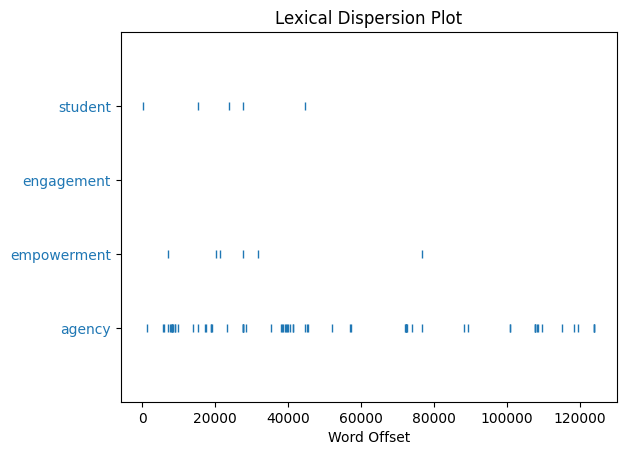

In [ ]:
# This will show a dispersion plot of the words of interest.
# This is a great useful function to use in NLTK, but it does not seem to display correctly when utilized in Google Colab
# You can see this if you compare the plot output below with our concordance search for "maybe"
# It actually seems to list the words in reverse order to what is on the plot

uncertainty_wordTextObjects.dispersion_plot(["agency","empowerment", "engagement", "student"])

Question:

What are some inferences we can make using a lexical dispersion plot like this one?

# 3.4 n-grams and collocations

N-grams are contiguous sequences of words (or other linguistic units) that appear in a data corpus. They are able to show patterns and relationships or word usage in a text. For example bigrams are patterns of two words that appear together and trigrams are a pattern of three words appearing together.

1. bigrams



In [ ]:
# Listing bigrams from data
uncertainty_bigrams = list(nltk.bigrams(uncertainty_wordTextObjects))
print(uncertainty_bigrams)

[('Actually,', 'we'), ('we', 'had'), ('had', 'a'), ('a', 'really'), ('really', 'interesting'), ('interesting', 'conversation'), ('conversation', 'at'), ('at', 'the'), ('the', 'middle'), ('middle', 'school'), ('school', 'Empower'), ('Empower', 'project'), ('project', 'about'), ('about', 'is'), ('is', 'it'), ('it', 'important'), ('important', 'to'), ('to', 'actually'), ('actually', 'separate'), ('separate', 'things'), ('things', 'out'), ('out', 'into'), ('into', 'living'), ('living', 'and'), ('and', 'nonliving,'), ('nonliving,', 'and'), ('and', 'by'), ('by', 'separating'), ('separating', 'things'), ('things', 'into'), ('into', 'living'), ('living', 'and'), ('and', 'nonliving,'), ('nonliving,', "you're"), ("you're", 'making'), ('making', 'certain'), ('certain', 'that'), ('that', 'you'), ('you', 'know'), ('know', 'what'), ('what', 'your'), ('your', 'goal'), ('goal', 'is.'), ('is.', "I'm"), ("I'm", 'not'), ('not', 'saying'), ('saying', 'that'), ('that', 'one'), ('one', "shouldn't"), ("shoul

2. trigrams

In [ ]:
# Listing trigrams from data
uncertainty_trigrams = list(nltk.trigrams(uncertainty_wordTextObjects))
print(uncertainty_trigrams)

[('Actually,', 'we', 'had'), ('we', 'had', 'a'), ('had', 'a', 'really'), ('a', 'really', 'interesting'), ('really', 'interesting', 'conversation'), ('interesting', 'conversation', 'at'), ('conversation', 'at', 'the'), ('at', 'the', 'middle'), ('the', 'middle', 'school'), ('middle', 'school', 'Empower'), ('school', 'Empower', 'project'), ('Empower', 'project', 'about'), ('project', 'about', 'is'), ('about', 'is', 'it'), ('is', 'it', 'important'), ('it', 'important', 'to'), ('important', 'to', 'actually'), ('to', 'actually', 'separate'), ('actually', 'separate', 'things'), ('separate', 'things', 'out'), ('things', 'out', 'into'), ('out', 'into', 'living'), ('into', 'living', 'and'), ('living', 'and', 'nonliving,'), ('and', 'nonliving,', 'and'), ('nonliving,', 'and', 'by'), ('and', 'by', 'separating'), ('by', 'separating', 'things'), ('separating', 'things', 'into'), ('things', 'into', 'living'), ('into', 'living', 'and'), ('living', 'and', 'nonliving,'), ('and', 'nonliving,', "you're"), 

# Collocations
Collocations are pairs or groups of words that tend to appear frequently together in a text, often with a specific meaning or connotation ('fast food', 'red wine', 'United States of America').  They are not just random word combinations but rather indicative of language patterns. Identifying collocations can be useful for understanding the associations between words in a text.

NLTK provides the collocations module, which includes methods to identify and extract collocations from a text. One common approach is to use the BigramAssocMeasures class along with the BigramCollocationFinder class to find significant word pairs (bigrams) based on various measures such as frequency among others.

In [ ]:
# display frequency of highest 50 bigrams
# See if you can identify any bigrams that might signal uncertainty
finder = nltk.collocations.BigramCollocationFinder.from_words(uncertainty_wordTextObjects)
finder.ngram_fd.tabulate(50)

                ('going', 'to')          ('separate', 'things')                     ('is', 'a')                  ('we', 'talk')               ('talk', 'about')                  ('want', 'to')               ("don't", 'have')               ('things', 'out')              ('into', 'living')               ('living', 'and')           ('and', 'nonliving,')              ('things', 'into')                ('know', 'what')             ('you', 'actually')                   ('I', 'like')                  ('kind', 'of')              ('and', 'abiotic')                   ('what', 'I')                 ('like', 'the')   ('traditional', 'ecological')                ('a', 'Western')           ('to', 'acknowledge')                    ('and', 'I')                   ('I', 'want')                    ('a', 'way')                  ('I', "don't")                 ('have', 'the')                  ('like', 'to')                ('you', 'know,')                  ('when', 'we')                    ('we', 'do')         

In [ ]:
# display frequency of highest 25 trigrams
finder = nltk.collocations.TrigramCollocationFinder.from_words(uncertainty_wordTextObjects)
finder.ngram_fd.tabulate(100)

                  ('we', 'talk', 'about')             ('separate', 'things', 'out')                 ('into', 'living', 'and')           ('living', 'and', 'nonliving,')                    ('is', 'a', 'Western')                      ('and', 'I', 'want')                       ('I', 'want', 'to')                    ('I', "don't", 'have')                  ("don't", 'have', 'the')                    ('when', 'we', 'talk')                ('Actually,', 'we', 'had')                        ('we', 'had', 'a')                    ('had', 'a', 'really')            ('a', 'really', 'interesting') ('really', 'interesting', 'conversation')     ('interesting', 'conversation', 'at')             ('conversation', 'at', 'the')                   ('at', 'the', 'middle')               ('the', 'middle', 'school')           ('middle', 'school', 'Empower')          ('school', 'Empower', 'project')           ('Empower', 'project', 'about')                ('project', 'about', 'is')                     ('about', 'is'

# Any number of Ns

If you have need to search for higher values of 'n', the following code cell when executed can search for any value of 'n' that you would like. Just change the number in line 4.

In [ ]:

from nltk.util import ngrams

n_value = 4  # Change this for different n values
fourgrams = ngrams(uncertainty_wordTextObjects, n_value)

# Tabulate the top n-grams
fdist = nltk.FreqDist(fourgrams)
fdist.tabulate(25)  # Top 10 fourgrams


# Change the value for n and identify any other n-grams that might signal uncertainty

        ('into', 'living', 'and', 'nonliving,')                      ('and', 'I', 'want', 'to')                   ('I', "don't", 'have', 'the')                 ('when', 'we', 'talk', 'about')                 ('Actually,', 'we', 'had', 'a')                    ('we', 'had', 'a', 'really')           ('had', 'a', 'really', 'interesting')  ('a', 'really', 'interesting', 'conversation') ('really', 'interesting', 'conversation', 'at')    ('interesting', 'conversation', 'at', 'the')         ('conversation', 'at', 'the', 'middle')               ('at', 'the', 'middle', 'school')          ('the', 'middle', 'school', 'Empower')      ('middle', 'school', 'Empower', 'project')       ('school', 'Empower', 'project', 'about')           ('Empower', 'project', 'about', 'is')                ('project', 'about', 'is', 'it')              ('about', 'is', 'it', 'important')                 ('is', 'it', 'important', 'to')           ('it', 'important', 'to', 'actually')     ('important', 'to', 'actually', 'sep

# Finding words that appear 'close' to each other.
The provided code snippet demonstrates how to search for instances of two specific words (e.g., "I" and "think") appearing within a certain distance from each other in a given text corpus. The code utilizes regular expressions and the NLTK library to tokenize the text, compile the regular expression pattern, and then search for matching sentences containing the specified word pair. It also includes a step to download the NLTK punkt tokenizer data if not already available, ensuring successful sentence tokenization.

* You should hopefully notice here that NLTK is able to use both word and sentence tokens interactively with each other.

In [ ]:
import nltk
# Download the NLTK punkt tokenizer data
nltk.download('punkt')
#from nltk.sent_tokenize import sent_tokenize
from nltk.text import Text
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You can change the words in line 9 and 10 to investigate different word combinations. Line 13 allows you to chage the maximum distance between the words.

In [ ]:

# Tokenize the text into words
corpus_words = nltk.word_tokenize(raw_uncertaintyText)

# Create a Text object from the tokenized words
corpus_text = Text(corpus_words)

# Define the two words to search for
word1 = "I"
word2 = "think"

# Define the maximum distance between the two words
max_distance = 2  # Adjust this value as needed

# Create a pattern for searching
pattern = r"\b" + word1 + r"\W+(?:\w+\W+){" + f"0,{max_distance}" + r"}" + word2 + r"\b"

# Extract plain text from the corpus_text object
plain_text = ' '.join(corpus_text.tokens)

# Compile the regular expression
search_regex = re.compile(pattern, re.IGNORECASE)

# Find sentences where the pattern appears
sentences = nltk.sent_tokenize(plain_text)

# Search for sentences where the two words appear within the specified distance
matching_sentences = []
for sentence in sentences:
    if search_regex.search(sentence):
        matching_sentences.append(sentence)

# Print the matching sentences
for sentence in matching_sentences:
    print(sentence)


But I do think it kind of defines the purview of biology to some extent .
You know�I mean� , I think acknowledging ( slowly ) ...


# Finding n-grams attached to a specific word

In [ ]:
import nltk
from nltk import ngrams
from collections import defaultdict

# Assuming you've already tokenized your text
corpus_words = nltk.word_tokenize(raw_uncertaintyText)

# Function to get n-grams with the word of interest
def get_ngrams_with_word(word, tokens, min_n=2, max_n=6):
    """
    Extract ngrams from tokens that contain the word of interest.

    Parameters:
    - word (str): word of interest
    - tokens (list): tokenized text
    - min_n (int): minimum n-gram size
    - max_n (int): maximum n-gram size

    Returns:
    - defaultdict(int): n-grams with their frequencies
    """
    relevant_ngrams = defaultdict(int)
    for n in range(min_n, max_n+1):
        for ngram in ngrams(tokens, n):
            if word in ngram:
                relevant_ngrams[ngram] += 1
    return relevant_ngrams

word_of_interest = "but"  # Or any other word you're interested in
ngram_frequencies = get_ngrams_with_word(word_of_interest, corpus_words)

# Printing the ngrams and their frequencies
for ngram, freq in ngram_frequencies.items():
    print(' '.join(ngram), ":", freq)


] but : 1
but if : 1
, but : 2
but .. : 1
but , : 1
Right ] but : 1
] but if : 1
but if you : 1
.. , but : 1
, but .. : 1
but .. the : 1
unit , but : 1
, but , : 1
but , you : 1
: Right ] but : 1
Right ] but if : 1
] but if you : 1
but if you are : 1
like .. , but : 1
.. , but .. : 1
, but .. the : 1
but .. the .. : 1
OpenSciED unit , but : 1
unit , but , : 1
, but , you : 1
but , you know : 1
T : Right ] but : 1
: Right ] but if : 1
Right ] but if you : 1
] but if you are : 1
but if you are doing : 1
knowledge like .. , but : 1
like .. , but .. : 1
.. , but .. the : 1
, but .. the .. : 1
but .. the .. way� : 1
the OpenSciED unit , but : 1
OpenSciED unit , but , : 1
unit , but , you : 1
, but , you know : 1
but , you know .. : 1
[ T : Right ] but : 1
T : Right ] but if : 1
: Right ] but if you : 1
Right ] but if you are : 1
] but if you are doing : 1
but if you are doing that : 1
ecological knowledge like .. , but : 1
knowledge like .. , but .. : 1
like .. , but .. the : 1
.. , but .. 

In [ ]:
import nltk
from nltk import ngrams
from collections import defaultdict

# Assuming you've already tokenized your text
corpus_words = nltk.word_tokenize(raw_uncertaintyText)

# Function to get n-grams with the word of interest
def get_ngrams_with_word(word, tokens, min_n=1, max_n=6):
    """
    Extract ngrams from tokens that contain the word of interest.

    Parameters:
    - word (str): word of interest
    - tokens (list): tokenized text
    - min_n (int): minimum n-gram size
    - max_n (int): maximum n-gram size

    Returns:
    - defaultdict(int): n-grams with their frequencies
    """
    relevant_ngrams = defaultdict(int)
    for n in range(min_n, max_n+1):
        for ngram in ngrams(tokens, n):
            if word in ngram:
                relevant_ngrams[ngram] += 1
    return relevant_ngrams

word_of_interest = "but"  # Or any other word you're interested in
ngram_frequencies = get_ngrams_with_word(word_of_interest, corpus_words)

# Frequency threshold
threshold = 1  # adjust this value as needed

# Printing the ngrams and their frequencies if above threshold
for ngram, freq in ngram_frequencies.items():
    if freq > threshold:
        print(' '.join(ngram), ":", freq)


but : 3
, but : 2


#4.3  Sentiment Analysis of Uncertainty Words in Classroom Transcripts
This code performs sentence-level sentiment analysis on our uncertainty transcript with a focus on words that indicate uncertainty. You can add or subtract words from the "uncertainty_words" dictionary in line 6. NLTK will keep track of frequency counts of each word and then analyze the sentiment intensities of the SENTENCE where the word is found. Giving the overall average sentiment for the sentences. The idea is to understand not just how often these words occur, but also the general emotional tone of the sentences in which they appear.

In [ ]:
nltk.download('vader_lexicon')
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create a list of words representing uncertainty
uncertainty_words = ["agency", "empower", "students", "teacher"]

# text from the high school math class transcript

# Sentence Tokenization
cleaned_sentences = sent_tokenize(raw_uncertaintyText)

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a dictionary to hold frequency count and sentiment scores for each uncertainty word
uncertainty_dict = {}

# Loop through each sentence in the cleaned transcript to find instances of uncertainty
for sentence in cleaned_sentences:
    tb = TextBlob(sentence)
    for word in uncertainty_words:
        if word.lower() in sentence.lower():
            if word not in uncertainty_dict:
                uncertainty_dict[word] = {'count': 0, 'sentiment': []}
            uncertainty_dict[word]['count'] += 1
            uncertainty_dict[word]['sentiment'].append(sia.polarity_scores(sentence)['compound'])

# Calculate average sentiment for each word of uncertainty
for word, data in uncertainty_dict.items():
    avg_sentiment = sum(data['sentiment']) / len(data['sentiment']) if data['sentiment'] else 0
    print(f"Word: {word}, Frequency: {data['count']}, Average Sentiment: {avg_sentiment}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Word: students, Frequency: 189, Average Sentiment: 0.32062962962962954
Word: teacher, Frequency: 141, Average Sentiment: 0.21587163120567376
Word: agency, Frequency: 9, Average Sentiment: 0.2943
Word: empower, Frequency: 3, Average Sentiment: 0.27476666666666666


# 4.4 Contextual Analysis of Sentences Sentiment Surrounding Uncertainty Words:

In this code snippet, the focus is on examining the sentences that appear immediately before and after a sentence containing the word "maybe," which serves as an example of an "uncertainty word."
In this case, when "maybe" is found in a sentence, the code adds the sentence immediately preceding it to before_uncertain bucket and the one immediately following it to after_uncertain bucket. Finally, the sentences stored in before_uncertain and after_uncertain are printed for researcher analysis. These can also be saved to text or csv files if needed for later usage.

This approach could be valuable for understanding the context in which uncertainty is expressed. By looking at the sentences before and after, we can gain insights into what typically precedes or follows an expression of uncertainty, and how that might inform our understanding of the emotional or instructional dynamics of the classroom.

In [ ]:
before_uncertain = []
after_uncertain = []
for i, sentence in enumerate(cleaned_sentences):
    if "agency" in sentence:  # Replace with any uncertainty word
        if i > 0:
            before_uncertain.append(cleaned_sentences[i-1])
        if i < len(cleaned_sentences) - 1:
            after_uncertain.append(cleaned_sentences[i+1])

# Now analyze sentiment for these sentences.
print(before_uncertain)
print(after_uncertain)

['What are your needs?', 'Okay.', "I don't have mine over here.", 'But overall, students got really into it.', "You don't have\nto make this\na journal\nprompt yet\nbecause it\nshould just be\nbrainstorming notes\nbut I think\nthis is helpful.", 'They are good materials, but I think as all good materials,\nthere are issues.', "So then what is the implications if it's a teacher pivot?", 'You know what I mean?', 'Or focus of this project.']
['Also, concretely, what does that mean in your materials?', "So partly this comes out of we wanted to have some kind\nof, like, anchoring phenomenon ourselves\nthat could kind of ground, like, what is it\nthat we're working on pedagogically?", 'What does it mean?', 'Questions?', "And we'll\nif we have time\nwe'll come together\nand try and craft\nkind of a synthesis\nof that.", 'It depends on your interpretation in the sense that\nthese anchoring phenomenons that open the unit are very carefully selected.', "I think that a teacher is always going\nto

# 4.5 Plotting Sentence-Level Sentiment Scores Over Time
This code snippet visualizes the sentiment scores of a list of sentences over time. It uses the TextBlob library to compute the sentiment polarity of each sentence in the list. Then, using Matplotlib, a line plot is generated to visualize these sentiment scores. The x-axis of the plot represents the sequence number of each sentence, while the y-axis represents the corresponding sentiment score.

The resulting plot provides a way to analyze the variation of sentiment in the whole text over time.

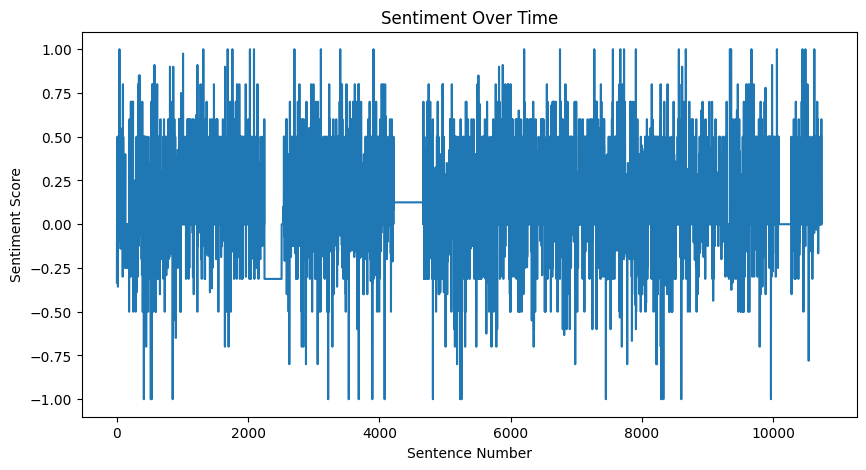

In [ ]:
# First, install necessary packages


# Import libraries
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Let's assume cleaned_sentences is your list of sentences
# cleaned_sentences = ["I am happy.", "I feel sad.", "Maybe I will feel better tomorrow.", ...]

# Initialize empty list to hold sentiment scores
sentiment_scores = []

# Loop over sentences and calculate sentiment
for sentence in cleaned_sentences:
    blob = TextBlob(sentence)
    sentiment_scores.append(blob.sentiment.polarity)

# Plot sentiment scores over time
plt.figure(figsize=(10, 5))
plt.plot(sentiment_scores)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.show()


#4.6 Find Sentence by Index Number from Tokenized Text
You can use this function to quickly retrieve specific sentences from the pre-tokenized text corpus, especially when you want to look up sentences for context or additional analysis.

In [ ]:
def search_sentence_by_index(index, cleaned_sentences):
    if 0 <= index < len(cleaned_sentences):
        return cleaned_sentences[index]
    else:
        return "Index out of range."

# Test the function
print(search_sentence_by_index(0, cleaned_sentences))
# '0' will show the first sentence. Replace '0'' with the index you want to look up from the previous outputs


I'm serious.


#4.8 Filtering and Ranking Sentences with Uncertainty Words by Sentiment Score

This code snippet first defines a list of words indicating uncertainty, such as "maybe," "probably," "might," etc. Then, it filters sentences from the cleaned_sentences list to include only those that contain at least one word from the uncertainty_words list. Along with each filtered sentence, its corresponding sentiment score is also retained.

The filtered sentences are sorted based on their sentiment scores. The code then extracts the top 10 and bottom 10 sentences based on these scores. You can change this number if needed.

Finally, it displays the top 10 sentences with the highest sentiment scores and the bottom 10 sentences with the lowest sentiment scores, all containing at least one word that indicates uncertainty.

This could be useful for analyzing how uncertainty is framed in positive or negative contexts within a data corpus.

In [ ]:
#Feel free to change the words found in the dictionary
uncertainty_words = ["student", "they"]

# Filter the sentences that contain at least one uncertainty word
filtered_sentiment_sentence_pairs = [(score, sentence) for score, sentence in zip(sentiment_scores, cleaned_sentences) if any(word in sentence for word in uncertainty_words)]

# Sort the list of tuples by the sentiment score
sorted_pairs = sorted(filtered_sentiment_sentence_pairs, key=lambda x: x[0])

# Extract the top 10 and bottom 10 sentences
# These numbers can be changed to a longer list
top_10_sentences = sorted_pairs[-10:]
bottom_10_sentences = sorted_pairs[:10]

# Display the top 10 sentences with highest sentiment scores
print("Top 10 sentences with highest sentiment scores containing uncertainty words:")
for score, sentence in reversed(top_10_sentences):
    print(f"Score: {score}, Sentence: {sentence}")

# Display the bottom 10 sentences with lowest sentiment scores
print("\nBottom 10 sentences with lowest sentiment scores containing uncertainty words:")
for score, sentence in bottom_10_sentences:
    print(f"Score: {score}, Sentence: {sentence}")

Top 10 sentences with highest sentiment scores containing uncertainty words:
Score: 1.0, Sentence: And students,
I think this is the one
that students felt
was the best project
in their eyes.
Score: 0.8, Sentence: And when students get sort of on that, it's a great experience.
Score: 0.8, Sentence: And they're nastier than the Great Lakes.
Score: 0.8, Sentence: So they have lots of great whites
and things of that sort.
Score: 0.8, Sentence: It was like they were great at it to start with, because I think that was
the math unit they were in to start with.
Score: 0.8, Sentence: So they switched on the fly, which I saw,
and I'm like, I like that.
Score: 0.8, Sentence: So this afternoon, basically the rest of the time today,
what we want to do is start with the lessons
that you have done that you are proud of
and that you think exemplify student agency ownership,
et cetera.
Score: 0.7, Sentence: Yeah, they're good.
Score: 0.7, Sentence: Are they good?
Score: 0.7, Sentence: So, no,
they've 

# 4.9 Visualizing Sentiment Score Trends for Sentences with Uncertainty Words

This code snippet visualizes the sentiment scores of sentences that contain words indicating uncertainty. The list is filtered to include only sentences that have uncertainty words. Using Matplotlib, the code then plots these sentiment scores against the sentence indices. The x-axis represents the index of each sentence in the filtered list, and the y-axis represents the sentiment score of each sentence.

This visualization could help in understanding how sentiment varies over time in sentences that contain words of uncertainty.

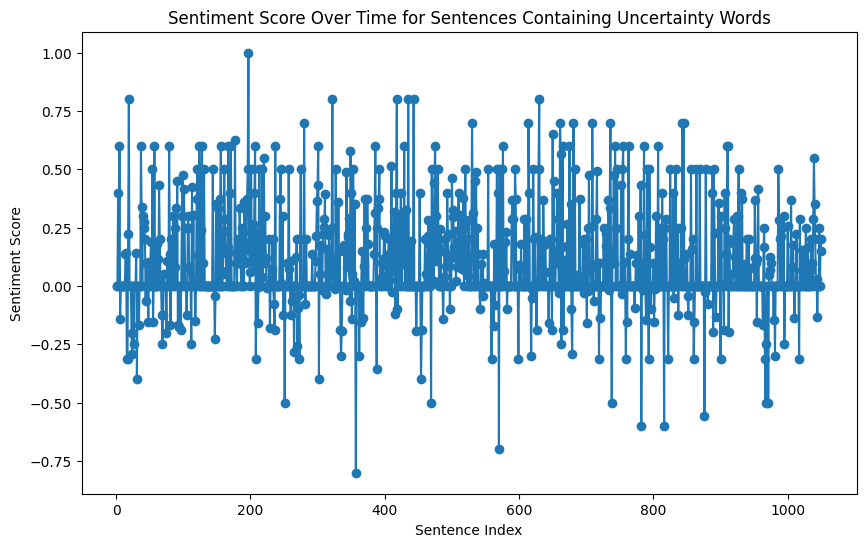

In [ ]:
import matplotlib.pyplot as plt

# Assuming `filtered_sentiment_sentence_pairs` contains tuples of (sentiment_score, sentence)
# and you have already filtered this list to include only sentences containing uncertainty words

# Extract just the sentiment scores
filtered_sentiment_scores = [score for score, _ in filtered_sentiment_sentence_pairs]

# Generate sentence indices for x-axis
sentence_indices = list(range(1, len(filtered_sentiment_scores) + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sentence_indices, filtered_sentiment_scores, marker='o', linestyle='-')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time for Sentences Containing Uncertainty Words')
plt.show()


# Topic Modeling Test

In [ ]:
import nltk
nltk.download('stopwords')
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocess text data
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return tokens

tokens = preprocess(raw_uncertaintyText)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0, '0.003*"I" + 0.001*"like" + 0.001*"going" + 0.001*"And" + 0.001*"know"')
(1, '0.094*"I" + 0.035*"like" + 0.017*"going" + 0.016*"know" + 0.016*"And"')
(2, '0.001*"I" + 0.000*"like" + 0.000*"And" + 0.000*"going" + 0.000*"know"')


# Sentiment Tset

In [ ]:
from textblob import TextBlob

def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment  # returns a tuple (polarity, subjectivity)

raw_text = raw_uncertaintyText
polarity, subjectivity = sentiment_analysis(raw_text)
print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")


Polarity: 0.12839231456588876, Subjectivity: 0.5100101273663177


# Named Entity Recognition (NER)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('averaged_perceptron_tagger')

nltk.download('maxent_ne_chunker')
nltk.download('words')

def named_entity_recognition(raw_uncertaintyText):
    words = word_tokenize(raw_uncertaintyText)
    pos_tags = pos_tag(words)
    chunked = ne_chunk(pos_tags)
    named_entities = []
    for tree in chunked:
        if isinstance(tree, nltk.Tree):
            named_entity = " ".join([word for word, tag in tree.leaves()])
            named_entities.append(named_entity)
    return named_entities

entities = named_entity_recognition(raw_text)
print(entities)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['Zach', 'Zach', 'Okay', 'Barbara', 'Which', 'Serengeti', 'Serengeti', 'Tasha', 'Okay', 'Okay', 'Plan', 'Lunch', 'Okay', 'Empower', 'Okay', 'Sorry', 'Okay', 'Alright', 'Barbie', 'Barbie', 'Barbie', 'Barbie', 'Barbie', 'Again', 'Chem Phys', 'DVD', 'Oppenheimer', 'Dennis', 'Dennis', 'Sorry', 'Alex', 'Netflix', 'AP', 'AP', 'AP', 'PTSD', 'Bill Nye', 'YouTube', 'YouTube', 'NBA', 'AP', 'DNA', 'Zach', 'AP', 'Nature Center', 'Urbana', 'Dutton', 'AP', 'COVID', 'Wednesdays', 'Carl Park', 'SEL', 'Snoop', 'Urbana', 'IHSA', 'Ashton', 'Barbara', 'CU Farm', 'School', 'Dennis', 'SEL', 'SEL', 'Zach', 'Cicero Illinois', 'NGSS', 'Urbana', 'Barbara', 'Sistina', 'Liz', 'Ashton', 'Ashton', 'Liz', 'Ashton', 'Dennis', 'Alex', 'Zach', 'Dennis', 'Panera', 'North Carolina', 'Mike', 'Mike', 'Liz', 'Liz', 'AP', 'AP', 'Urbana', 'Kennedy', 'English', 'English', 'AP English', 'Urbana', 'UHS', 'Mr. Riley', 'Eric', 'Mexico', 'UMS', 'UHS', 'COVID', 'STM', 'Chicago', 'Silicon', 'California', 'Zach', 'Nick', 'Susie', 'Nic